<a href="https://colab.research.google.com/github/pallavisonagote/Sentiment_Analysis/blob/master/amazon_review_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Drive and Create Path 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')      #mount drive to colab

Mounted at /content/gdrive


In [2]:
import os
 #kaggle.json from drive

os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle/Amazon_sentiment_analysis/"

In [3]:
%cd /content/gdrive/My Drive/Kaggle/Amazon_sentiment_analysis/

/content/gdrive/My Drive/Kaggle/Amazon_sentiment_analysis


In [4]:
pwd         #check working directory

'/content/gdrive/My Drive/Kaggle/Amazon_sentiment_analysis'

# Downloading Dataset to google drive

In [ ]:
! kaggle datasets download -d bittlingmayer/amazonreviews      # download dataset using kaggle api

 99% 490M/493M [00:04<00:00, 111MB/s]
100% 493M/493M [00:04<00:00, 116MB/s]


In [ ]:
!ls

amazonreviews.zip  kaggle.json	test.ft.txt.bz2  train.ft.txt.bz2


In [ ]:
!unzip \*.zip  && rm *.zip                #unzipping the zip files and deleting the zip files

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


# Data Preprocessing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bz2      # used to work with fast files format
import re       # used to work with regular expression
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences


%matplotlib inline

In [6]:
# here hte function will seperate labels and text 
# labels in array { 1: positive , 0: negative review}

def label_texts(file):
  label=[]
  text=[]

  for line in bz2.BZ2File(file):
    x=line.decode("utf-8")
    label.append(int(x[9])-1)
    text.append(x[10:].strip())
  
  return np.array(label),text  

In [7]:
train_label,train_text=label_texts('train.ft.txt.bz2')
test_label,test_text=label_texts('test.ft.txt.bz2')

In [8]:
train_label=train_label[0:500]
train_text=train_text[0:500]

In [9]:
train_text[1]

"The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny."

# Data Analysis

In [10]:
from wordcloud import WordCloud

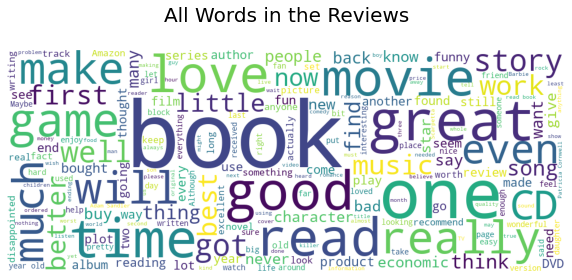

In [11]:
train_txt = train_text       # Load text 

# Create wordcloud
wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=400
                     ).generate(" ".join(train_txt))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('All Words in the Reviews\n',size=20)
plt.axis('off')
plt.show()

In [12]:
# words is array with words that shows sentiment
words = ['awesome','great','fantastic','extraordinary','amazing','super','magnificent','stunning','impressive','wonderful','breathtaking',
                 'love','content','pleased','happy','glad','satisfied','lucky', 'shocking','cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate']

rt = " ".join(train_text)



diz = {}
for word in rt.split(" "):
    if word in words:
        diz[word] = diz.get(word,0)+1
        



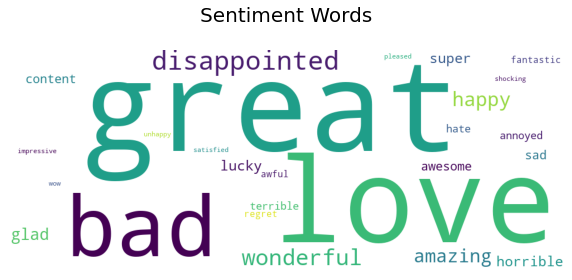

In [13]:
wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=400
                     ).generate_from_frequencies(diz)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('Sentiment Words\n',size=20)
plt.axis('off')
plt.show()



In [14]:
# here positive sentiment is more than the negative

# Text Preprocessig

In [15]:
#substitute or remove all non ASCI and non Alphanumeric characters from text

NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')

def normalize_text(texts):
  normalized_text = []
  for text in texts:
    lower = text.lower()
    no_punctucation = NON_ALPHANUM.sub(r' ',lower)     # sub == substitute
    no_non_ascii=NON_ASCII.sub(r'',no_punctucation)
    normalized_text.append(no_non_ascii)
  return normalized_text


In [16]:
train_texts = normalize_text(train_text)
test_texts = normalize_text(test_text)

In [17]:
train_texts[1]

'the best soundtrack ever to anything   i m reading a lot of reviews saying that this is the best  game soundtrack  and i figured that i d write a review to disagree a bit  this in my opinino is yasunori mitsuda s ultimate masterpiece  the music is timeless and i m been listening to it for years now and its beauty simply refuses to fade the price tag on this is pretty staggering i must say  but if you are going to buy any cd for this much money  this is the only one that i feel would be worth every penny '

# Model Selection

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=True)
cv.fit(train_texts)

X = cv.transform(train_text)
X_test = cv.transform(test_text)



In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X,train_label,test_size=0.25) 

In [21]:
for c in [0.01,0.05,0.25,0.5,1]:
  lr = LogisticRegression(C=c)
  lr.fit(X_train,y_train)
  print("Accuracy for C=%s : %s" 
        %(c,accuracy_score(y_val,lr.predict(X_val))))

Accuracy for C=0.01 : 0.728
Accuracy for C=0.05 : 0.792
Accuracy for C=0.25 : 0.808
Accuracy for C=0.5 : 0.808
Accuracy for C=1 : 0.808


# Prediction

In [22]:
y_test = lr.predict(X_test)

# Save Model

In [23]:
import pickle

In [24]:
# save the model to disk
predicted_sentiment = 'sentiment_analysis.sav'
pickle.dump(lr, open(predicted_sentiment, 'wb'))